# Demonstration of the DrawEvent class

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb
import openturns.viewer as otv
import pylab as pl

## 3D problem

In [2]:
problem = otb.ReliabilityProblem33()

In [3]:
event = problem.getEvent()
g = event.getFunction()

In [4]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()

In [5]:
inputDimension = distribution.getDimension()
inputDimension

3

In [6]:
alpha = 1 - 0.00001

In [7]:
bounds, marginalProb = distribution.computeMinimumVolumeIntervalWithMarginalProbability(
    alpha
)

In [8]:
referencePoint = distribution.getMean()
referencePoint

class=Point name=Unnamed dimension=3 values=[0,0,0]

In [9]:
inputVector = event.getAntecedent()
event = problem.getEvent()
g = event.getFunction()

In [10]:
drawEvent = otb.DrawEvent(event)

The highest level method is the `draw` method which flags allow to gather various graphics into a single one.

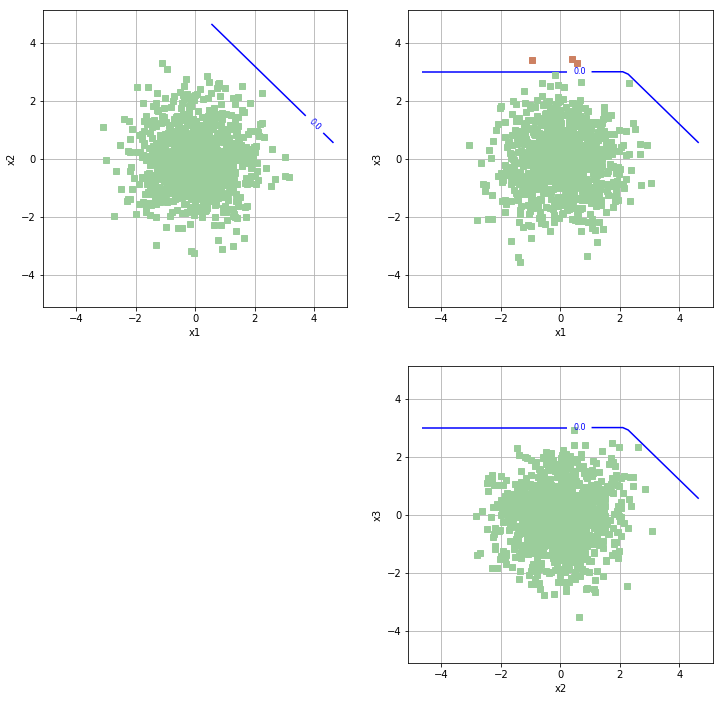

In [11]:
_ = drawEvent.draw(bounds)

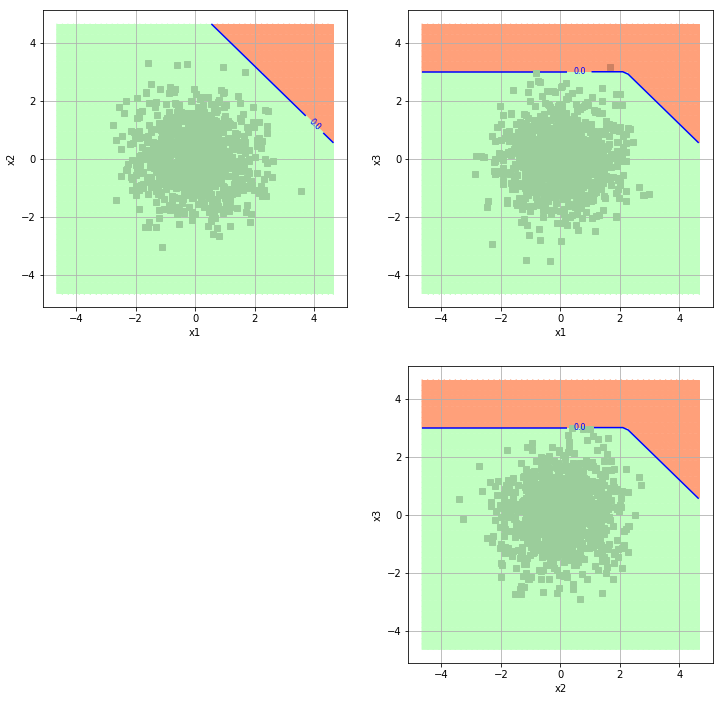

In [12]:
_ = drawEvent.draw(bounds, fillEvent=True)

The `drawLimitState` method only draws the limit state.

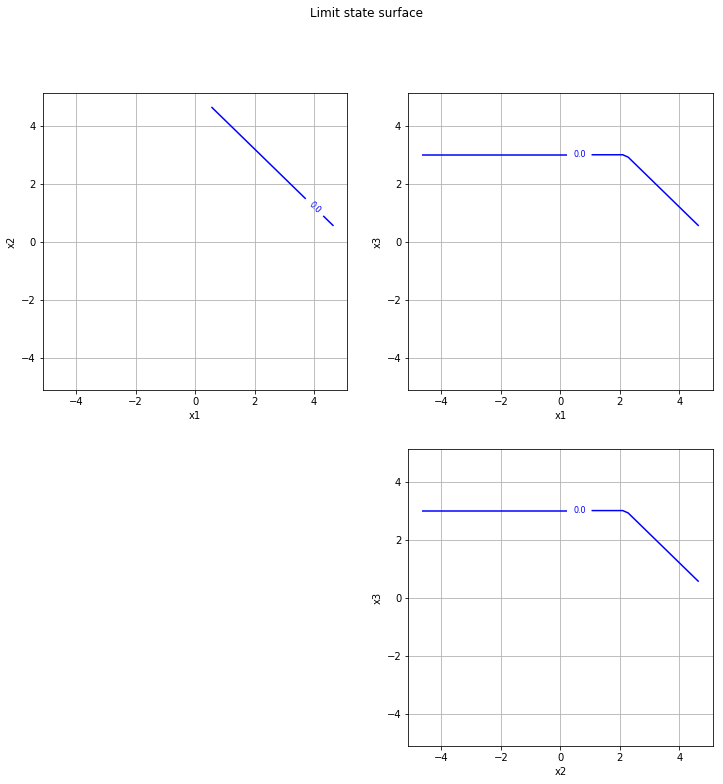

In [13]:
_ = drawEvent.drawLimitState(bounds)

The `drawSample` method plots a sample with a color code which specifies which points are inside or outside the event.

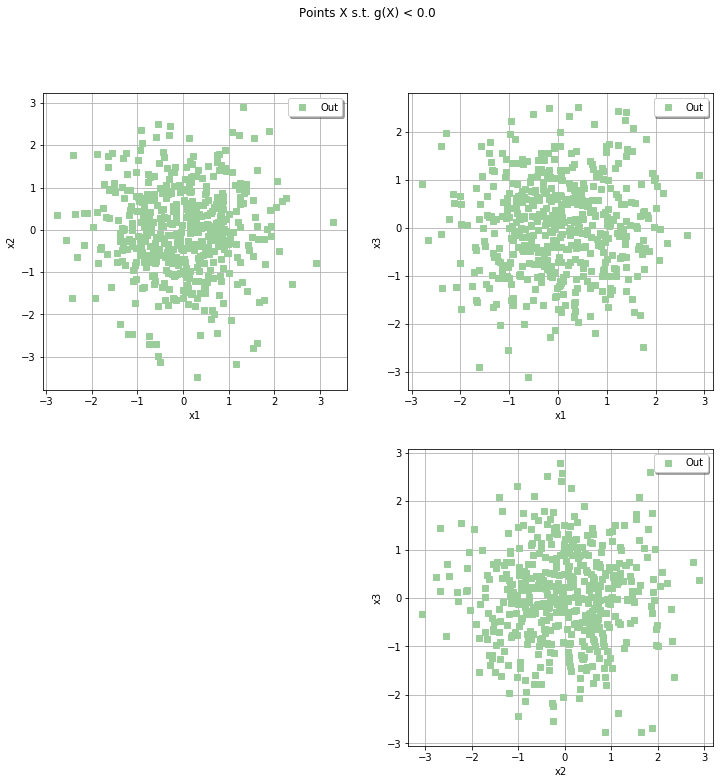

In [14]:
sampleSize = 500
_ = drawEvent.drawSample(sampleSize)

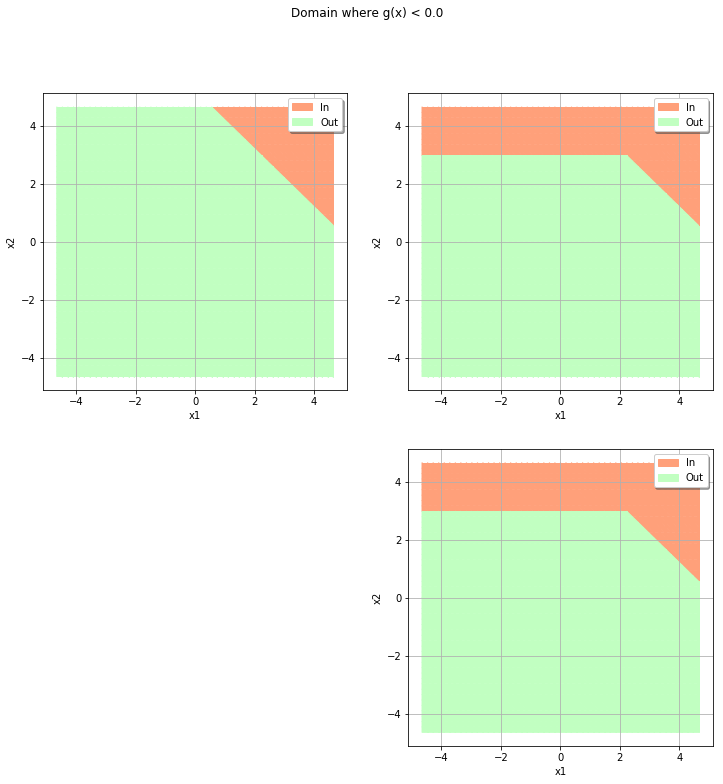

In [15]:
_ = drawEvent.fillEvent(bounds)

## 2D problem

When the problem has 2 dimensions, single cross-cuts are sufficient. This is why we use the `*CrossCut` methods.

In [16]:
problem = otb.ReliabilityProblem22()

In [17]:
event = problem.getEvent()
g = event.getFunction()

In [18]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()
bounds, marginalProb = distribution.computeMinimumVolumeIntervalWithMarginalProbability(
    1.0 - 1.0e-6
)

In [19]:
sampleSize = 10000
drawEvent = otb.DrawEvent(event)

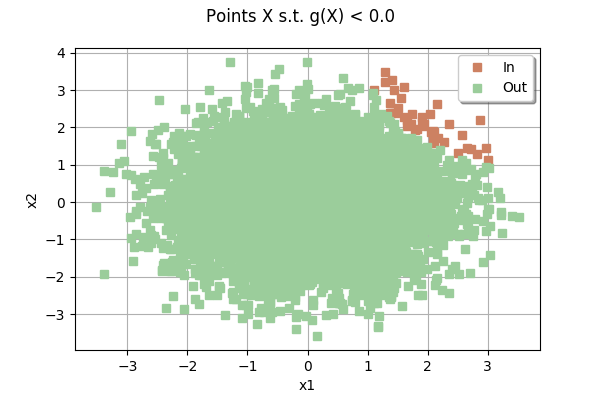

In [20]:
cloud = drawEvent.drawSampleCrossCut(sampleSize)
cloud

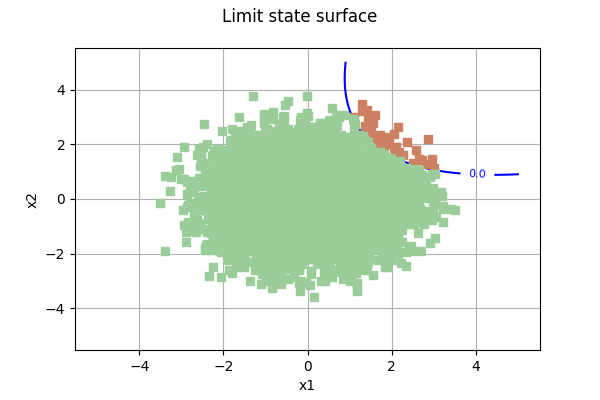

In [21]:
graph = drawEvent.drawLimitStateCrossCut(bounds)
graph.add(cloud)
graph

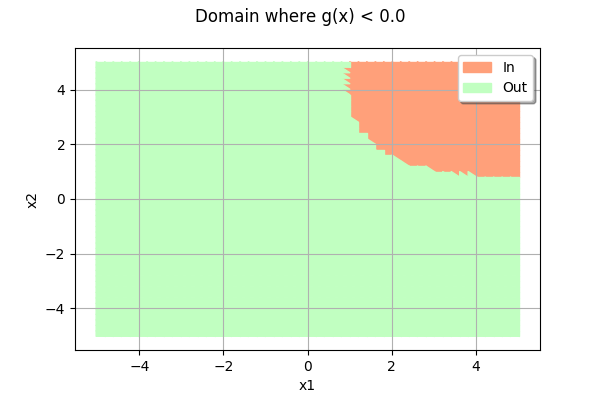

In [22]:
domain = drawEvent.fillEventCrossCut(bounds)
domain

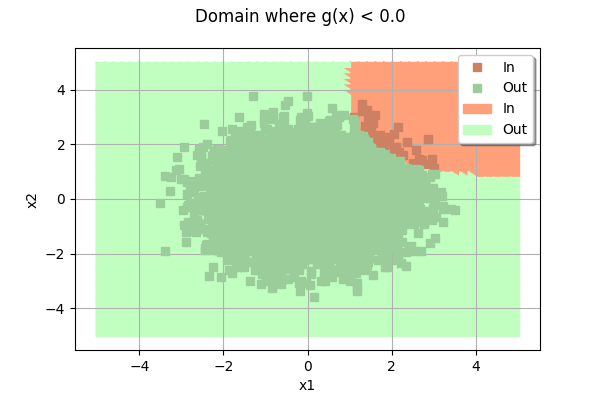

In [23]:
domain.add(cloud)
domain

For a 2D sample, it is sometimes handy to re-use a precomputed sample. In this case, we can use the `drawInputOutputSample` method. 

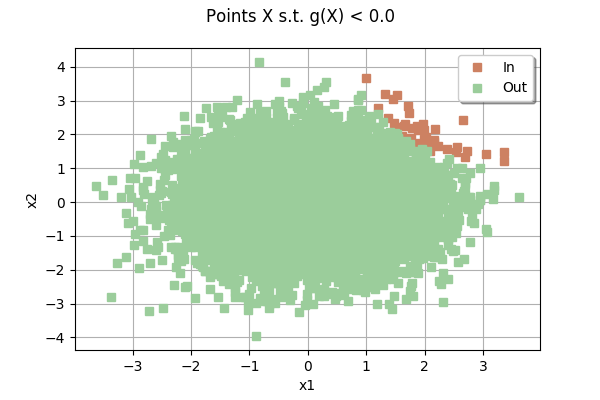

In [24]:
inputSample = distribution.getSample(sampleSize)
outputSample = g(inputSample)
drawEvent.drawInputOutputSample(inputSample, outputSample)